<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/sacarsmdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Mô tả bài toán***: Đây là bài toán nhằm dự đoán xem một bài báo có phải là châm biếm hay không dựa vào tiêu đề của nó.

***Cách thức thu thập dataset:*** 
 - Thu thập các headline và đường link của dataset về châm biếm từ trang báo https://www.theonion.com/ , đây là trang chỉ viết các bài báo châm biếm.
 - Thu thập các headline và đường link của dataset không phải châm biếm từ trang báo https://www.huffpost.com/, đây là trang chỉ viết các bài báo chính thống. 

Đầu tiên tiến hành liên kết googledrive với googlecolab để lấy dữ liệu

In [1]:
from google.colab import drive 
drive.mount('/content/drive')  #liên kết nội dung của googledrive vào googlecolab tại thư mục có tên drive trên googlecolab

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Tiến hành đọc dữ liệu bằng thư viện pandas và đường liên kết của file dữ liệu có sẵn trong thư mục theo đường link drive/My Drive/SarcasmDetection

Tiến hành đọc dữ liệu gốc của bài toán từ 2 file .json

In [ ]:
import pandas as pd
data1=pd.read_json('/content/drive/My Drive/SarcasmDetection/Sarcasm_Headlines_Dataset.json',lines=True) 
#lines=True ở đây có nghĩa là đọc dữ liệu theo từng dòng
data1

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [ ]:
data2=pd.read_json('/content/drive/My Drive/SarcasmDetection/Sarcasm_Headlines_Dataset_v2.json',lines=True)

In [ ]:
data2

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


Tiến hành ghép 2 bộ dữ liệu chúng ta vừa đọc thành một bộ dữ liệu tổng quát bằng câu lệnh pd.concat(câu lệnh ghép các đối tượng pandas với nhau theo trục)
ở đây cố định là trục 0 hay trục dọc nên k cần thay đổi

In [ ]:
data=pd.concat([data1,data2],ignore_index=True)   

ignore_index=True nghĩa là bộ data2 sẽ được gộp vào bộ data1 và sẽ nhận các giá trị index mới, không phải từ  1 -> 28618  mà bắt đầu từ 26709 -> 55327

In [ ]:
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
55323,https://www.theonion.com/jews-to-celebrate-ros...,jews to celebrate rosh hashasha or something,1
55324,https://local.theonion.com/internal-affairs-in...,internal affairs investigator disappointed con...,1
55325,https://www.huffingtonpost.com/entry/andrew-ah...,the most beautiful acceptance speech this week...,0
55326,https://www.theonion.com/mars-probe-destroyed-...,mars probe destroyed by orbiting spielberg-gat...,1


Bộ dữ liệu khá lớn, có 3 features: + article_link (đường dẫn)
                                  + headline ( tiêu đề bài báo)
                                  + is_sarcastic (nếu bằng 1 thì bài báo đó là sarcasm, bằng 0 thì ngược lại).
Tuy nhiên đối với bài toán này ta chỉ sử dụng headline và is_sarcastic

Tiến hành đọc bộ dữ liệu mới tự thu thập được lưu trên ggdrive

---



In [ ]:
collected_data=pd.read_excel('/content/drive/My Drive/SarcasmDetection/newdataset.xlsx')
collected_data

,headline,article_link,is_sarcastic
0,Michelle Obama Shares Sweet Family Throwback P...,https://www.huffpost.com/entry/michelle-obama-...,0
1,'Walk Of Shame': Deflated Trump's Lonely Helic...,https://www.huffpost.com/entry/donald-trump-he...,0
2,"John Bolton Won’t Vote For Trump, Hopes He Wil...",https://www.huffpost.com/entry/john-bolton-vot...,0
3,Noose Found In Garage Used By NASCAR’s Bubba W...,https://www.huffpost.com/entry/noose-nascar-bu...,0
4,Tom Petty's Family Demands Trump Stop Using 'I...,https://www.huffpost.com/entry/tom-petty-donal...,0
...,...,...,...
2031,Department Of Evil: ‘All Of You Must Die’,https://www.theonion.com/department-of-evil-al...,1
2032,Giannis Antetokounmpo To Take Off Next 3 Seaso...,https://sports.theonion.com/giannis-antetokoun...,1
2033,Bloomberg Campaign Raises Visibility By Pumpin...,https://politics.theonion.com/bloomberg-campai...,1
2034,Website Offers Porn To Passengers Trapped On Q...,https://www.theonion.com/website-offers-porn-t...,1


Bộ dữ liệu mới gồm 2036 bài báo trong đó gồm 1026 bài là nonsarcasm và 1010 bài là sarcasm

**Feature Engineering**

---



Kiểm tra xem có bao nhiêu kí tự số trong tập headlines

In [ ]:
numbers=0
c=''
for x in data['headline']:
   for c in x:
      if (c.isdigit()==True): numbers+=1
numbers

18885

Ta thấy rằng số kí tự số rất lớn tuy nhiên đối với yêu cầu của bài toán này thì các kí tự số không phản ánh được vấn đề bài toán mà thậm chí còn gây nhiễu, sai lệch trong quá trình training => Ta tiến hành loại bỏ kí tự số

In [ ]:
X=data['headline'].str.replace('\d+', '')


 \d+: chuỗi kí tự có một hoặc nhiều chữ số, câu lệnh ở phía trên là để thay thế toàn bộ kí tự chữ số thành kí tự trống 


Tách bộ dữ liệu thành 2 phần training set và test set với tỉ lệ 80% và 20% => Tránh overfitting

In [ ]:
from sklearn.model_selection import train_test_split 
y=data['is_sarcastic']
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.2,random_state=1,) 

random_state=1 => lựa chọn một cách ngẫu nhiên 

Ta tiến hành xây dựng Bag of Words sau đó chuyển đổi các headlines về dạng ma trận với hàm CountVectorizer từ thư viện sklearn, tiếp đến dùng hàm TfidfTransformer để đánh giá lại về giá trị các từ bởi vì có những từ tuy xuất hiện nhiều lần nhưng nó lại thực sự không quan trọng (the, and, is,of,that,...)=> giúp model đạt kết quả chính xác hơn

VD để hiểu rõ hơn về 2 hàm CountVectorizer() và TfidfTransformer
 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
sentence=['This is the first document.',
          'This is the second second document.',
          'And the third one.',
          'Is this the first document?',]
vectorizer = CountVectorizer()
y = vectorizer.fit_transform(sentence)
print("Các từ trong đoạn văn:")
print(vectorizer.get_feature_names())
print("Ma trận hóa đoạn văn:")
print(y.toarray())

Các từ trong đoạn văn:
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
Ma trận hóa đoạn văn:
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


Cách thức hàm CountVectorizer ma trận hóa đoạn văn bản ví dụ ở trên:
    
   


- Đầu tiên liệt kê các loại từ có trong văn bản ( ở ví dụ trên là 9 loại từ ) hay tạo mảng gồm các loại từ, ở đây giả sử gọi là mảng k.

 - Tiến hành ma trận hóa văn bản thành ma trận 9 cột 4 hàng (văn bản gồm 4 dòng)

 Ví dụ về cách chuyển hàng đầu tiên: Xét các từ trong mảng k từ đầu mảng đến cuối mảng, bắt đầu với từ 'and' thì trong câu đầu tiên xuất hiện 0 lần => X[0][0]=0, từ 'document' xuất hiện 1 lần X[0][1]=1, từ 'first' xuất hiện 1 lần => X[0][2]=1,'is' xuất hiện 1 lần => X[0][3]=1, 'one' xh 0 lần => x[0][4] = 0, 'second' xuất hiện 0 lần => x[0][5]=0, 'the' xuất hiện 1 lần => x[0][6]=1,'third' xuất hiện 0 lần => x[0][7]=0, 'this' xuất hiện 1 lần => x[0][8]=1
Vậy ta được ma trận chuyển hóa với hàng đầu tiên là: 0 1 1 1 0 0 1 0 1 
Các hàng còn lại ta có thể làm tương tự để được kết quả như trên

Bằng việc chuyển đổi như trên thì ta được một ma trận số hóa của văn bản tuy nhiên như vậy thì những từ không có nhiều ý nghĩa như (the,and,is,..) lại có cùng mức độ quan trọng so với những từ như (document,..) => điều này có thể gây sai lệch cho model trong quá trình training nên ta phải đánh giá lại giá trị của các từ bằng TfidfTransformer()

In [40]:
transformer = TfidfTransformer()
print(y.toarray())
tfidf = transformer.fit_transform(y).toarray()
print(tfidf)

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]
[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.27230147 0.         0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]]


Giải thích về cách tính Tfidf ở đây:
  
  
  


   Tfidf = Tf * idf,với:

Tf: tần số xuất hiện của 1 từ trong văn bản  = Thương của số lần xuất hiện 1 từ trong văn bản và số lần xuất hiện nhiều nhất của một từ bất kỳ trong văn bản đó.


 idf: nghịch đảo tần số của văn bản chứa từ nhất định = log(Tổng số văn bản / số văn bản chứa từ đó+1)

Ta thấy những từ không quan trọng (the,and,it,is,...) thường xuất hiện nhiều trong các văn bản cho nên theo công thức trên ta thấy số văn bản chứa từ đó càng nhiều thì idf càng thấp => tfidf càng thấp => tầm quan trọng của từ đó thấp

***Xây dựng model***

Thay vì tự thực hiện tuần tực các bước biến đổi CountVectorizer(),TfidfTransformer() và fit model thì ta có thể xây dựng pipeline để liên kết 3 bước lại với nhau cho máy tự thức hiện một cách nhanh gọn và thuận lợi hơn trong việc tinh chỉnh tham số.

NAIVE BAYES


0.9577082956804627


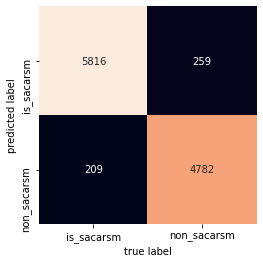

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns;
import numpy as np
import matplotlib.pyplot as plt
target_name=['is_sacarsm','non_sacarsm']
model=Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),
               ('tfidf',TfidfTransformer(False)),
               ('clf',MultinomialNB(alpha=0.01)),
])

model.fit(X_train,y_train)
y_model=model.predict(X_validation)
mat = confusion_matrix(y_validation, y_model)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label');
print(accuracy_score(y_validation,y_model)) #performance


In [ ]:
def predict_category(s,train=data,model=model):
   pred = model.predict(s)
   if (pred==1): print("is_sacarsm")
   else: print("non_sarcasm")
predict_category(["it was, for, uh, medical reasons,’ says doctor to boris johnson, explaining why they had to give him haircut"])

non_sarcasm


SVM

In [ ]:
from sklearn.linear_model import SGDClassifier
text_clf_svm=Pipeline([('vect',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('clf-svm',SGDClassifier(random_state=42)),
])
text_clf_svm.fit(X_train,y_train)
predict_svm=text_clf_svm.predict(X_validation)
accuracy_score(y_validation,predict_svm)

0.8772817639616844

Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={ 'vect__ngram_range':[(1,1),(1,2)],
              'tfidf__use_idf': (True,False),
              'clf__alpha':(1e-2,1e-3), 
           }
gs_clf=GridSearchCV(model,parameters,n_jobs=-1)
gs_clf.fit(X_train,y_train)
gs_clf.best_score_
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

In [ ]:
parameters_svm={'vect__ngram_range':[(1,1),(1,2)],
                'tfidf__use_idf': (True,False),
                'clf-svm__alpha':(1e-2,1e-3),
               }
gs_clf_svm=GridSearchCV(text_clf_svm,parameters_svm,n_jobs=-1)
gs_clf_svm.fit(X_train,y_train)
gs_clf_svm.best_score_
gs_clf_svm.best_params_

{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

0.8841496475691307